In [1]:
from bliss.models.galaxy_flow import CenteredGalaxyLatentFlow
from bliss.models.galaxy_net import OneCenteredGalaxyAE

In [2]:
import os
os.chdir("../..")

In [3]:
#latent_flow = CenteredGalaxyLatentFlow.load_from_checkpoint("./output/default/version_119/checkpoints/epoch=719-val_loss=184.844.ckpt")
latent_flow = CenteredGalaxyLatentFlow.load_from_checkpoint("./models/sdss_autoencoder_flow.ckpt")

In [4]:
n_samples = 33
samples = latent_flow.flow.sample(n_samples)

In [5]:
galaxy_ae = OneCenteredGalaxyAE.load_from_checkpoint("./models/sdss_autoencoder.ckpt")

In [6]:
decoder = galaxy_ae.get_decoder()

In [7]:
images = decoder(samples)

In [8]:
from matplotlib import pyplot as plt

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

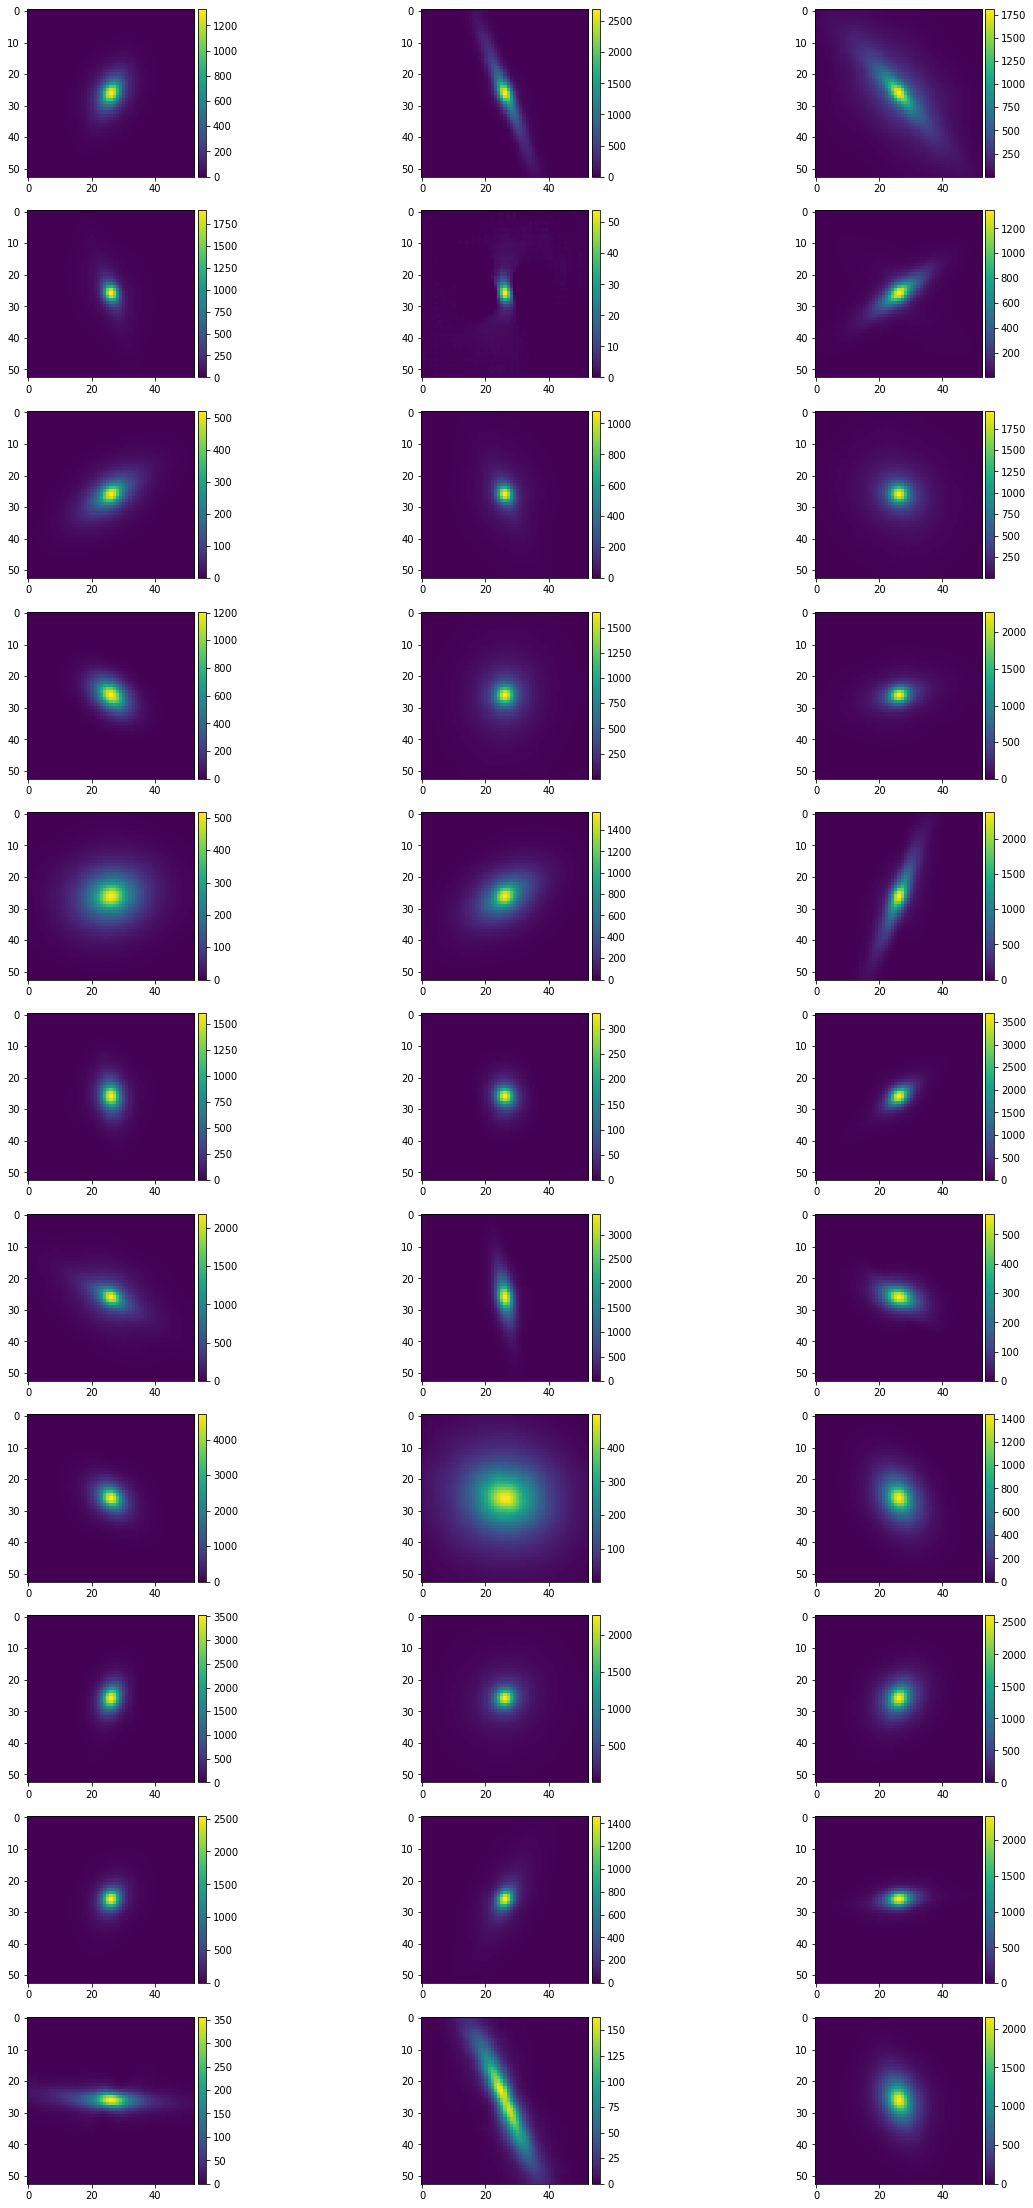

In [10]:
%matplotlib inline
fig, axes = plt.subplots(nrows=n_samples//3, ncols=3, figsize=(20, 40))
for (i, ax) in enumerate(axes.flatten()):
    im = ax.imshow(images[i, 0].detach().numpy())
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    #im = ax.matshow(image, vmin=vmin, vmax=vmax)
    fig.colorbar(im, cax=cax, orientation="vertical")
#plt.imshow(images[1,0].detach().numpy())

In [11]:
import torch
with torch.no_grad():
    samples2 = latent_flow.flow.sample(1000).detach()

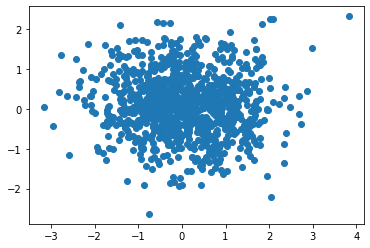

In [12]:
%matplotlib inline
plt.scatter(samples2[:, 0], samples2[:, 1])

In [13]:
z2 = latent_flow.flow.transform_to_noise(samples2).detach()

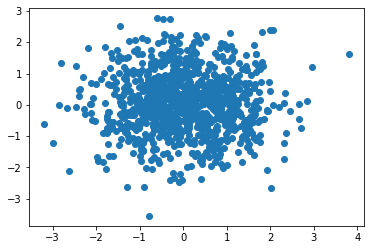

In [14]:
%matplotlib inline
plt.scatter(z2[:, 0], z2[:, 1])